# Simple exploration of Laplacian modification

In [1]:
import matplotlib.pyplot as plt
import torch
import os
import sys
sys.path.insert(0, "./lib/")
import laplacian
import ninja
import sys
import utils
import model
import graphs
from utils import set_device
from laplacian import normalized_laplacian
import numpy as np
from scipy import sparse

import networkx as nx
# Autoreload
%load_ext autoreload
%autoreload 2

# Line Graph with dirac signal

In [2]:
Line1 = nx.path_graph(9)
Line2 = nx.path_graph(5)

Signal1 = torch.Tensor([10,0,0,0,0,0,0,0,0])
Signal2 = torch.Tensor([10,0,0,0,0])

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


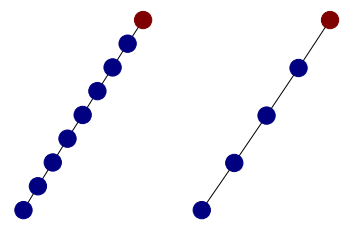

In [3]:
plt.subplot(121)
nx.draw_kamada_kawai(Line1, node_color = Signal1, cmap='jet' )
plt.subplot(122)
nx.draw_kamada_kawai(Line2, node_color = Signal2, cmap='jet')

In [4]:
L1 = nx.normalized_laplacian_matrix(Line1)
L2 = nx.normalized_laplacian_matrix(Line2)

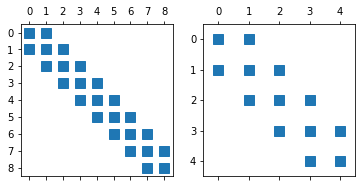

In [5]:
plt.subplot(121)
plt.spy(L1)
plt.subplot(122)
plt.spy(L2)

In [6]:
print(L2.todense())

[[ 1.         -0.70710678  0.          0.          0.        ]
 [-0.70710678  1.         -0.5         0.          0.        ]
 [ 0.         -0.5         1.         -0.5         0.        ]
 [ 0.          0.         -0.5         1.         -0.70710678]
 [ 0.          0.          0.         -0.70710678  1.        ]]


# Cheby

In [7]:
from utils import chebyshev
from laplacian import rescale_L, normalized_laplacian


In [8]:
lambda_max = sparse.linalg.eigs(L1, 1, which='LM',return_eigenvectors=False)[0].real
Poly = chebyshev(torch.Tensor(rescale_L(L1.todense(), lambda_max)),Signal1.unsqueeze(1),5)

lambda_max = sparse.linalg.eigs(L2, 1, which='LM',return_eigenvectors=False)[0].real
Poly2 = chebyshev(torch.Tensor(rescale_L(L2.todense(), lambda_max)),Signal2.unsqueeze(1),5)

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


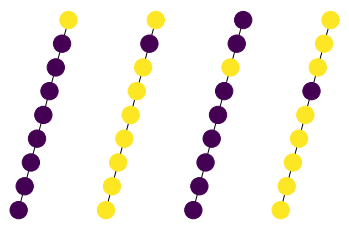

In [9]:
plt.subplot(141)
nx.draw_kamada_kawai(Line1, node_color = Poly[0].squeeze())
plt.subplot(142)
nx.draw_kamada_kawai(Line1, node_color = Poly[1].squeeze())
plt.subplot(143)
nx.draw_kamada_kawai(Line1, node_color = Poly[2].squeeze())
plt.subplot(144)
nx.draw_kamada_kawai(Line1, node_color = Poly[3].squeeze())

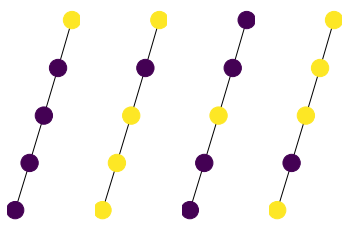

In [10]:
plt.subplot(141)
nx.draw_kamada_kawai(Line2, node_color = Poly2[0].squeeze() )
plt.subplot(142)
nx.draw_kamada_kawai(Line2, node_color = Poly2[1].squeeze() )
plt.subplot(143)
nx.draw_kamada_kawai(Line2, node_color = Poly2[2].squeeze() )
plt.subplot(144)
nx.draw_kamada_kawai(Line2, node_color = Poly2[3].squeeze())

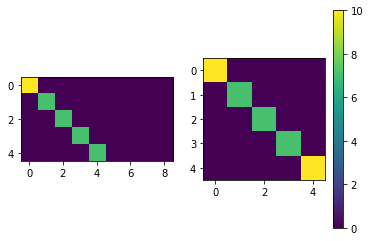

In [11]:
plt.subplot(121)
plt.imshow(abs(Poly.squeeze()))
plt.subplot(122)
plt.imshow(abs(Poly2.squeeze()))
plt.colorbar()

# Changing Laplacian

In [12]:
print(L1.todense())

[[ 1.         -0.70710678  0.          0.          0.          0.
   0.          0.          0.        ]
 [-0.70710678  1.         -0.5         0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.5         1.         -0.5         0.          0.
   0.          0.          0.        ]
 [ 0.          0.         -0.5         1.         -0.5         0.
   0.          0.          0.        ]
 [ 0.          0.          0.         -0.5         1.         -0.5
   0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.5         1.
  -0.5         0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.5
   1.         -0.5         0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.5         1.         -0.70710678]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.70710678  1.        ]]


In [13]:
L2BIS = L2.todense() + np.eye(5)*5
print(L2BIS)

[[ 6.         -0.70710678  0.          0.          0.        ]
 [-0.70710678  6.         -0.5         0.          0.        ]
 [ 0.         -0.5         6.         -0.5         0.        ]
 [ 0.          0.         -0.5         6.         -0.70710678]
 [ 0.          0.          0.         -0.70710678  6.        ]]


In [14]:

lambda_max = sparse.linalg.eigs(L2BIS, 1, which='LM',return_eigenvectors=False)[0].real
L2BIS = rescale_L(L2BIS, lambda_max)
print(L2BIS)

[[ 0.71428571 -0.20203051  0.          0.          0.        ]
 [-0.20203051  0.71428571 -0.14285714  0.          0.        ]
 [ 0.         -0.14285714  0.71428571 -0.14285714  0.        ]
 [ 0.          0.         -0.14285714  0.71428571 -0.20203051]
 [ 0.          0.          0.         -0.20203051  0.71428571]]


In [15]:
lambda_max = sparse.linalg.eigs(L1, 1, which='LM',return_eigenvectors=False)[0].real
XPoly = chebyshev(torch.Tensor(rescale_L(L1.todense(), lambda_max)),Signal1.unsqueeze(1),5)
XPoly2 = chebyshev(torch.Tensor(L2BIS),Signal2.unsqueeze(1),5)

/Users/axel/miniconda3/envs/DGL/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


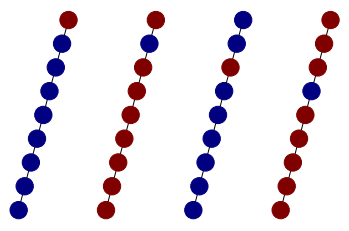

In [16]:
plt.subplot(141)
nx.draw_kamada_kawai(Line1, node_color = XPoly[0].squeeze(), cmap ='jet')
plt.subplot(142)
nx.draw_kamada_kawai(Line1, node_color = XPoly[1].squeeze(), cmap ='jet')
plt.subplot(143)
nx.draw_kamada_kawai(Line1, node_color = XPoly[2].squeeze(), cmap ='jet')
plt.subplot(144)
nx.draw_kamada_kawai(Line1, node_color = XPoly[3].squeeze(), cmap ='jet')

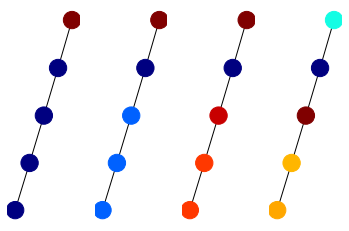

In [17]:
plt.subplot(141)
nx.draw_kamada_kawai(Line2, node_color = XPoly2[0].squeeze(), cmap ='jet')
plt.subplot(142)
nx.draw_kamada_kawai(Line2, node_color = XPoly2[1].squeeze(), cmap ='jet')
plt.subplot(143)
nx.draw_kamada_kawai(Line2, node_color = XPoly2[2].squeeze(), cmap ='jet')
plt.subplot(144)
nx.draw_kamada_kawai(Line2, node_color = XPoly2[3].squeeze(), cmap ='jet')

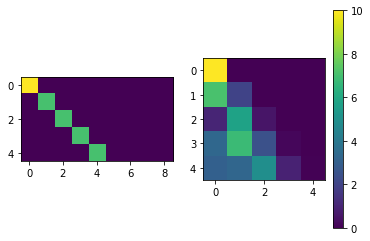

In [18]:
plt.subplot(121)
plt.imshow(abs(XPoly.squeeze()))
plt.subplot(122)
plt.imshow(abs(XPoly2.squeeze()))
plt.colorbar()

In [19]:
XPoly

tensor([[[ 1.0000e+01],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 1.1102e-14],
         [-7.0711e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 0.0000e+00],
         [-2.8262e-14],
         [ 7.0711e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 2.8866e-14],
         [ 0.0000e+00],
         [ 4.0822e-14],
         [-7.0711e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00],
         [ 0.0000e+00]],

        [[ 6.4095e-29],
         [-5.3383e-14],
         [ 0.0000e+00],
         [-5.3383e-14],
         [ 7.0711e+00],
        

In [20]:
XPoly2

tensor([[[10.0000],
         [ 0.0000],
         [ 0.0000],
         [ 0.0000],
         [ 0.0000]],

        [[ 7.1429],
         [-2.0203],
         [ 0.0000],
         [ 0.0000],
         [ 0.0000]],

        [[ 1.0204],
         [-5.7723],
         [ 0.5772],
         [ 0.0000],
         [ 0.0000]],

        [[-3.3528],
         [-6.8031],
         [ 2.4738],
         [-0.1649],
         [ 0.0000]],

        [[-3.0612],
         [-3.2985],
         [ 4.9477],
         [-0.9424],
         [ 0.0666]]])